In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree, metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import Any
from sklearn.model_selection import GridSearchCV

In [2]:
hotel_df = pd.read_csv('/content/Hotel Reservations.csv')

**Summarize the Dataset**

In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
#With isnull().sum(), we can see how many null values have in each column
hotel_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
#All unique values for each column
for column in hotel_df.columns:
    unique_values = hotel_df[column].unique()
    num_unique = len(unique_values)
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {num_unique}\n")

Column: Booking_ID
Unique Values: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
Number of Unique Values: 36275

Column: no_of_adults
Unique Values: [2 1 3 0 4]
Number of Unique Values: 5

Column: no_of_children
Unique Values: [ 0  2  1  3 10  9]
Number of Unique Values: 6

Column: no_of_weekend_nights
Unique Values: [1 2 0 4 3 6 5 7]
Number of Unique Values: 8

Column: no_of_week_nights
Unique Values: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
Number of Unique Values: 18

Column: type_of_meal_plan
Unique Values: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Number of Unique Values: 4

Column: required_car_parking_space
Unique Values: [0 1]
Number of Unique Values: 2

Column: room_type_reserved
Unique Values: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Number of Unique Values: 7

Column: lead_time
Unique Values: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99

**Illustration of Dataset**

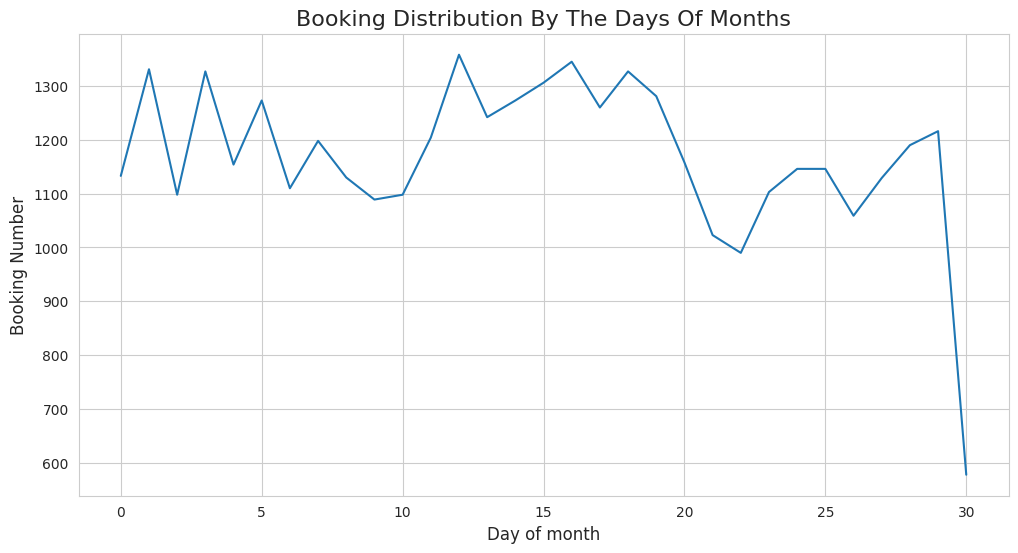

In [7]:
#Visualization of Booking Distribution By The Days Of Months

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(
     data=hotel_df.arrival_date.value_counts().sort_index().values)
plt.title("Booking Distribution By The Days Of Months", fontsize=16)
plt.ylabel("Booking Number",fontsize=12)
plt.xlabel("Day of month",fontsize=12)
plt.show()

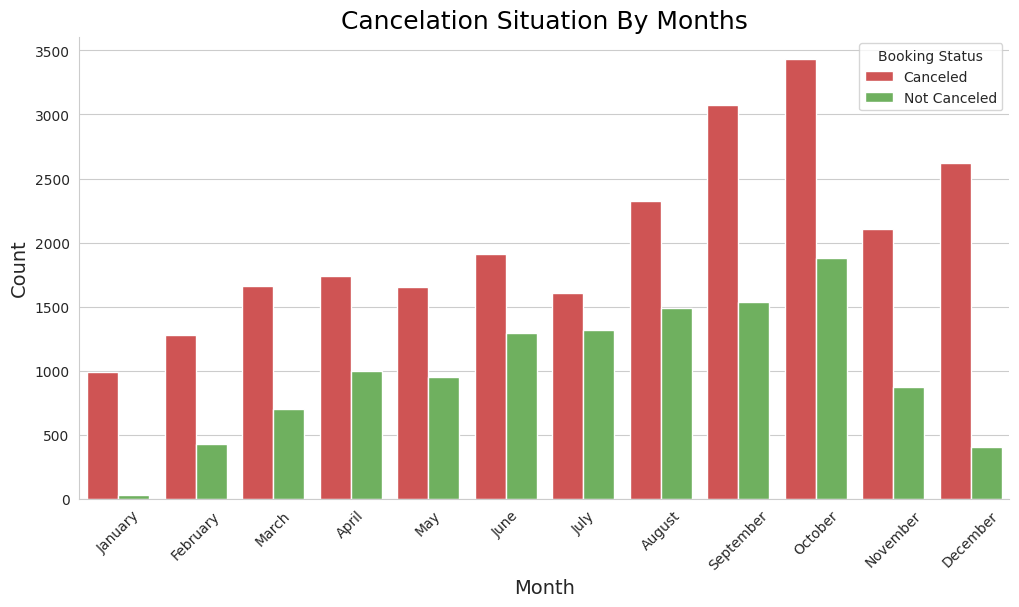

In [8]:
#Visualization of Cancelation Situation By Months

plt.figure(figsize=(12, 6))
cancel_colors = ['#e34040', '#67bd51']
sns.countplot(x='arrival_month', hue='booking_status', data=hotel_df, palette=cancel_colors)
plt.title("Cancelation Situation By Months", color="#000000", fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(np.arange(12), ["January", "February", "March", "April", "May", "June",
"July", "August", "September", "October", "November", "December"], rotation=45)
plt.legend(title='Booking Status', loc='upper right', labels=['Canceled', 'Not Canceled'])
sns.despine()

In [9]:
kid_cancel_data = hotel_df.groupby(['no_of_children', 'booking_status']).size().reset_index(name='counts')
kid_cancel_data

,no_of_children,booking_status,counts
0,0,Canceled,10882
1,0,Not_Canceled,22695
2,1,Canceled,540
3,1,Not_Canceled,1078
4,2,Canceled,457
5,2,Not_Canceled,601
6,3,Canceled,5
7,3,Not_Canceled,14
8,9,Canceled,1
9,9,Not_Canceled,1


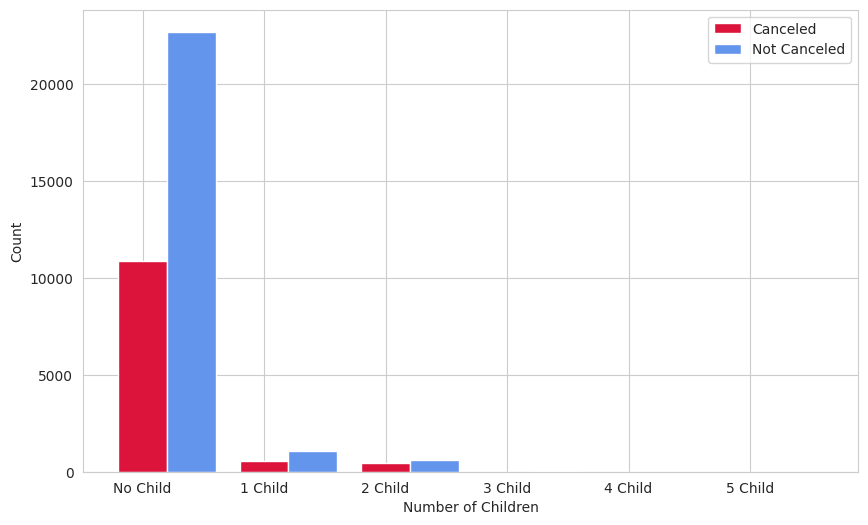

In [10]:
#Visualization of the number of bookings that were cancelled and not cancelled based on the number of children.

cancel_counts = [10882, 540, 457, 5, 1, 0]
not_cancel_counts = [22695, 1078, 601, 14, 1, 1]

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(cancel_counts))
ax.bar(x, cancel_counts, width=0.4, color='#DC143C', align='center', label='Canceled')
ax.bar([i+0.4 for i in x], not_cancel_counts, width=0.4, color='#6495ED', align='center', label='Not Canceled')
plt.xticks(x, [f"{i} Child" if i != 0 else "No Child" for i in x])
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.legend(loc='best')
plt.show()

**Choosed all columns except**

1.   'Booking_ID'
2.   'booking_status'



**Reasons:**

**Booking_ID -> It gives only the number of unique values ​​and does not help us to predict.**

**booking_status -> Feature we already want to predict**

In [11]:
hotel_df = pd.read_csv('Hotel Reservations.csv')

hotel_df = hotel_df.drop(['Booking_ID'],axis=1)


In [ ]:
hotel_df.fillna(hotel_df.mean(), inplace=True)
hotel_df = hotel_df.round()


In [13]:
# Transform categorical 
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

label_encoder = LabelEncoder()
for col in cat_cols:
    hotel_df[col] = label_encoder.fit_transform(hotel_df[col])

In [14]:
#Prepare Data

X = hotel_df.drop('booking_status', axis=1)
y = hotel_df['booking_status']

#XGBoost cannot directly process categorical data, it is necessary to convert it to numeric format.
y = hotel_df['booking_status'].apply(lambda x: 0 if x == 'Canceled' else 1)

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
hotel_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.0,0,Not_Canceled
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,107.0,1,Not_Canceled
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.0,0,Canceled
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.0,0,Canceled
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.0,0,Canceled


In [16]:
# DecisionTree - Holdout and CV

classification_method_DecisionTree = tree.DecisionTreeClassifier()
classification_model_DecisionTree = classification_method_DecisionTree.fit(X_train, y_train)
y_pred = classification_model_DecisionTree.predict(X_test)
accuracy_DecisionTree = accuracy_score(y_test, y_pred)

print("DecisionTree Accuracy (holdout): ", accuracy_DecisionTree,"\n")

classification_scores_DecisionTree = cross_val_score(classification_method_DecisionTree, X, y, cv=5)

print("DecisionTree Accuracy (Cross Validation): %0.5f (+/- %0.5f)" % (classification_scores_DecisionTree.mean(), classification_scores_DecisionTree.std()*2 ))
print("Cross Validation Scores: ", classification_scores_DecisionTree,"\n")

DecisionTree Accuracy (holdout):  0.8730129559864008 

DecisionTree Accuracy (Cross Validation): 0.86371 (+/- 0.01594)
Cross Validation Scores:  [0.85306685 0.86050999 0.8678153  0.8766368  0.86050999] 



In [17]:
# RandomForest - Holdout and CV

classification_method_RandomForest = RandomForestClassifier()
classification_method_RandomForest.fit(X_train, y_train)
y_pred_RandomForest = classification_method_RandomForest.predict(X_test)
accuracy_RandomForest = accuracy_score(y_test, y_pred_RandomForest)

print("RandomForest Accuracy (holdout): ", accuracy_RandomForest,"\n")

classification_scores_RandomForest = cross_val_score(classification_method_RandomForest, X, y, cv=5)

print("RandomForest Accuracy (Cross Validation): %0.5f (+/- %0.5f)" % (classification_scores_RandomForest.mean(), classification_scores_RandomForest.std() * 2))
print("Cross Validation Scores: ", classification_scores_RandomForest,"\n")


RandomForest Accuracy (holdout):  0.9050813194891114 

RandomForest Accuracy (Cross Validation): 0.90252 (+/- 0.00420)
Cross Validation Scores:  [0.90282564 0.9026878  0.89910407 0.90572019 0.90227429] 



In [18]:
# XGBoost - Holdout and CV

classification_method_XGBoost = XGBClassifier()

classification_method_XGBoost.fit(X_train, y_train)
y_pred_XGBoost = classification_method_XGBoost.predict(X_test)
accuracy_XGBoost = accuracy_score(y_test, y_pred_XGBoost)

print("XGBoost Accuracy (holdout): ", accuracy_XGBoost ,"\n")

classification_scores_XGBoost = cross_val_score(classification_method_XGBoost, X, y, cv=5)

print("XGBoost Accuracy (Cross Validation): %0.5f (+/- %0.5f)" % (classification_scores_XGBoost.mean(), classification_scores_XGBoost.std() * 2))
print(classification_scores_XGBoost,"\n")

XGBoost Accuracy (holdout):  0.8908389230910595 

XGBoost Accuracy (Cross Validation): 0.89163 (+/- 0.01102)
[0.89937974 0.8923501  0.88394211 0.89524466 0.88725017] 



In [19]:
models = pd.DataFrame({
'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
'Accuracy (Holdout)': [accuracy_DecisionTree, accuracy_RandomForest, accuracy_XGBoost],
'Accuracy (Cross Validation)': [classification_scores_DecisionTree.mean(), classification_scores_RandomForest.mean(), classification_scores_XGBoost.mean()]
})

models.sort_values(by='Accuracy (Holdout)', ascending=False)

,Model,Accuracy (Holdout),Accuracy (Cross Validation)
1,Random Forest,0.905081,0.902522
2,XGBoost,0.890839,0.891633
0,Decision Tree,0.873013,0.863708


In [11]:
param_grid={'n_estimators':[30,50,80,120,200,300,400,500,600],'max_depth':[5,10,15,20,25,30,50]}
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=5, n_jobs=2)
 
grid_search.fit(X_train,y_train)
 
grid_search.best_params_,grid_search.best_score_

({'max_depth': 25, 'n_estimators': 300}, 0.8981173861030379)

In [20]:
# RandomForest - Holdout and CV With best parameters

classification_method_RandomForest = RandomForestClassifier(max_depth= 25,n_estimators=300)
classification_method_RandomForest.fit(X_train, y_train)
y_pred_RandomForest = classification_method_RandomForest.predict(X_test)
accuracy_RandomForest = accuracy_score(y_test, y_pred_RandomForest)

print("RandomForest Accuracy (holdout): ", accuracy_RandomForest,"\n")

classification_scores_RandomForest = cross_val_score(classification_method_RandomForest, X, y, cv=5)

print("RandomForest Accuracy (Cross Validation): %0.5f (+/- %0.5f)" % (classification_scores_RandomForest.mean(), classification_scores_RandomForest.std() * 2))
print("Cross Validation Scores: ", classification_scores_RandomForest,"\n")


RandomForest Accuracy (holdout):  0.9048056602039879 

RandomForest Accuracy (Cross Validation): 0.90335 (+/- 0.00337)
Cross Validation Scores:  [0.90434183 0.90296347 0.90034459 0.90530669 0.90379049] 



**Outcome : Without parameters, Random Forest Method accuracy is higher.**